## Medical Dataset ML model building

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("MedicalDataset_Update.csv")
df.head()

,Unnamed: 0,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,BMI,Smoker,Diabetes,Health
0,0,1,45,120,95,141,22.630809,1,0,1
1,1,0,45,147,85,197,27.349662,1,0,3
2,2,1,71,124,94,239,23.115311,1,0,3
3,3,1,39,112,95,227,31.492492,1,1,3
4,4,1,44,142,95,193,22.783389,0,0,1


In [3]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,BMI,Smoker,Diabetes,Health
0,1,45,120,95,141,22.630809,1,0,1
1,0,45,147,85,197,27.349662,1,0,3
2,1,71,124,94,239,23.115311,1,0,3
3,1,39,112,95,227,31.492492,1,1,3
4,1,44,142,95,193,22.783389,0,0,1


In [23]:
f = [1,2,3,4,5]

In [26]:
j = np.array(f)#.reshape(1,-1)
j

array([1, 2, 3, 4, 5])

In [29]:
df.iloc[0:5,:].values

array([[  1.        ,  45.        , 120.        ,  95.        ,
        141.        ,  22.63080911,   1.        ,   0.        ,
          1.        ],
       [  0.        ,  45.        , 147.        ,  85.        ,
        197.        ,  27.34966234,   1.        ,   0.        ,
          3.        ],
       [  1.        ,  71.        , 124.        ,  94.        ,
        239.        ,  23.11531134,   1.        ,   0.        ,
          3.        ],
       [  1.        ,  39.        , 112.        ,  95.        ,
        227.        ,  31.4924918 ,   1.        ,   1.        ,
          3.        ],
       [  1.        ,  44.        , 142.        ,  95.        ,
        193.        ,  22.78338881,   0.        ,   0.        ,
          1.        ]])

In [16]:
df['Smoker'].unique()

array([1, 0], dtype=int64)

## First Check the outliers 

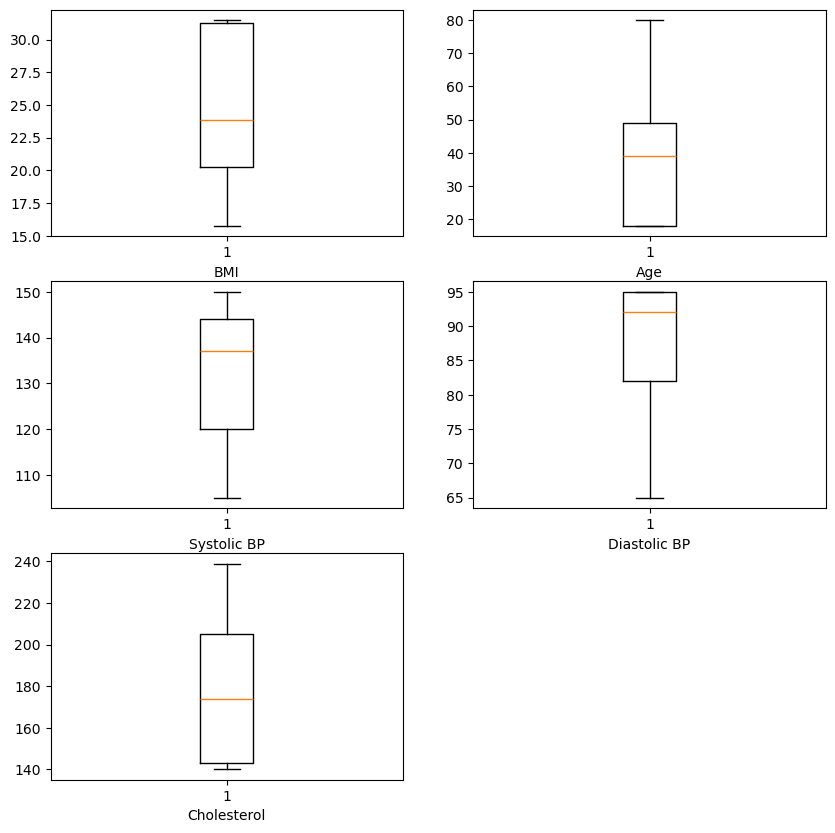

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.boxplot(df['BMI'])
plt.xlabel("BMI")
plt.subplot(322)
plt.boxplot(df['Age'])
plt.xlabel("Age")
plt.subplot(323)
plt.boxplot(df['Systolic BP'])
plt.xlabel("Systolic BP")
plt.subplot(324)
plt.boxplot(df['Diastolic BP'])
plt.xlabel("Diastolic BP")
plt.subplot(325)
plt.boxplot(df['Cholesterol'])
plt.xlabel("Cholesterol")
plt.show()

## check if tha dataset is imbalanced

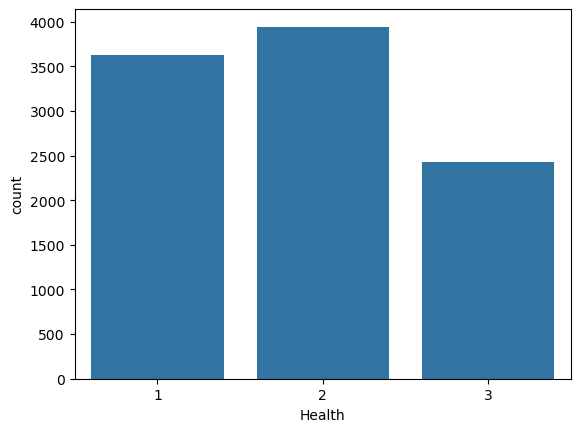

In [19]:
sns.countplot(x=df["Health"])
plt.show()

## first train test split the data

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

# KNN model

In [33]:
KNN_accuracies = []
for i in range(1,30):
    KNN_clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1,weights='distance')
    KNN_clf.fit(x_train,y_train)
    y_pred = KNN_clf.predict(x_test)
    KNN_accuracies.append(accuracy_score(y_test, y_pred))

In [34]:
no_neighbors = [i for i in range(1, 30)]

Maximum Accuracy 0.557 with nearest neighbors: 22


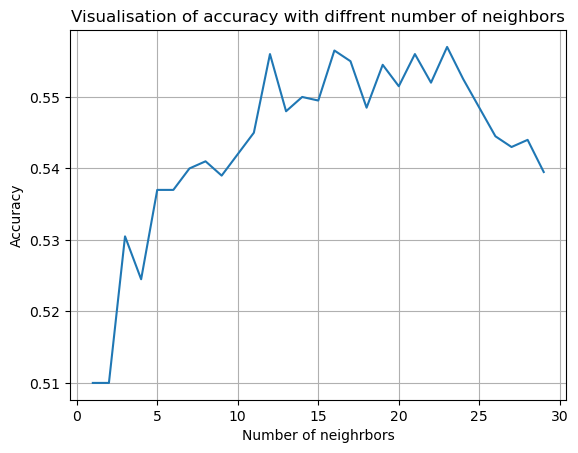

In [35]:
plt.grid()
sns.lineplot(x=no_neighbors,y=KNN_accuracies)
plt.title("Visualisation of accuracy with diffrent number of neighbors")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighrbors")
print(f"Maximum Accuracy {max(KNN_accuracies)} with nearest neighbors: {KNN_accuracies.index(max(KNN_accuracies))}")
plt.show()

# Decision Tree

In [36]:
max_features = [0.25,0.50,0.75,1.0]
max_depth = [2,4,6,8]
min_samples_leaf = [2,4,6,8]
min_samples_split = [3,5,7]

In [37]:
param_grid = {"max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

In [38]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [40]:
rf_grid = GridSearchCV(estimator = dt_clf,
                      param_grid=param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [42]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [0.25, 0.5, 0.75, 1.0],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [3, 5, 7]},
             verbose=2)

In [43]:
rf_grid.best_params_

{'max_depth': 8,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [44]:
rf_grid.best_score_

0.82325

# Logistic Regression

In [13]:
weights = 10000 / (3 * np.bincount(df["Health"]))
print(weights)

[       inf 0.91827365 0.84516565 1.37400385]


C:\Users\Raunak Gola\AppData\Local\Temp\ipykernel_30448\2690884919.py:1: RuntimeWarning: divide by zero encountered in divide
  weights = 10000 / (3 * np.bincount(df["Health"]))


In [14]:
LR_clf = LogisticRegression(max_iter=2500,class_weight={1:0.91827365,2:0.84516565,3:1.37400385},n_jobs=-1,C=50)

In [15]:
LR_clf.fit(x_train,y_train)
y_pred1 = LR_clf.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred1)*100)

Accuracy:  99.75


In [18]:
cm = confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1,target_names=['good','fair','bad']))

              precision    recall  f1-score   support

        good       1.00      1.00      1.00       741
        fair       1.00      1.00      1.00       791
         bad       1.00      1.00      1.00       468

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



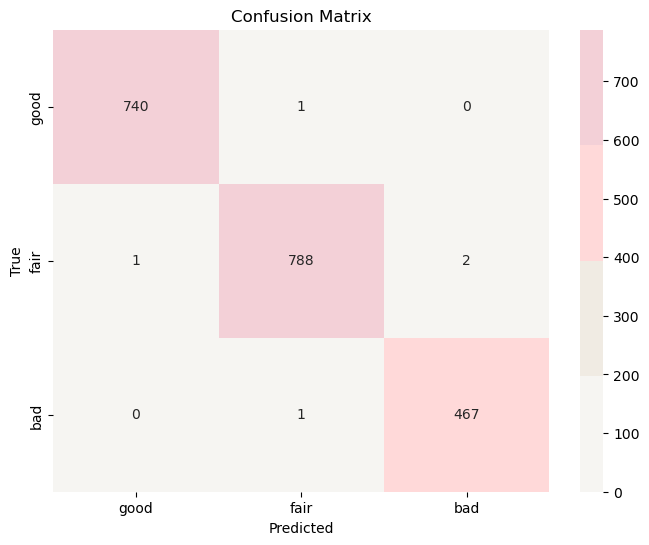

In [7]:
classes = ['good','fair','bad']
blue = ['#F6F5F2','#F0EBE3','#ffd9d9','#F3D0D7']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=blue,xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [99]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
SVM_accuracies = []
for i in kernel:
    SVC_clf = SVC(kernel=i,class_weight={1:0.91827365,2:0.84516565,3:1.37400385}).fit(x_train,y_train)
    y_pred = SVC_clf.predict(x_test)
    SVM_accuracies.append(accuracy_score(y_test, y_pred))

Maximum Accuracy 0.9915 with nearest neighbors: linear


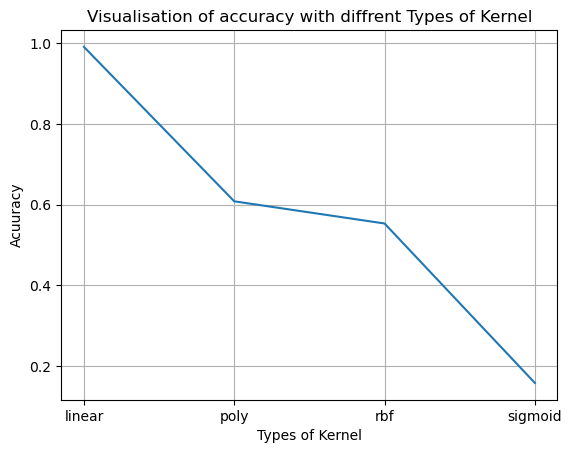

In [100]:
plt.grid()
sns.lineplot(x=kernel,y=SVM_accuracies)
plt.title("Visualisation of accuracy with diffrent Types of Kernel")
plt.ylabel("Acuuracy")
plt.xlabel("Types of Kernel")
print(f"Maximum Accuracy {max(SVM_accuracies)} with nearest neighbors: {kernel[SVM_accuracies.index(max(SVM_accuracies))]}")
plt.show()

In [211]:
from sklearn.model_selection import cross_val_score
SVM_clf2 = SVC(kernel='linear',class_weight={1:0.91827365,2:0.84516565,3:1.37400385}, random_state=0,C=10)
scores = cross_val_score(SVM_clf2, X, y, cv=7,n_jobs=-1)
scores

array([0.99510147, 0.99510147, 0.99440168, 0.99090273, 0.99719888,
       0.9964986 , 0.99369748])

In [224]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.00


In [222]:
SVM_clf3 = SVC(kernel='linear',class_weight={1:0.91827365,2:0.84516565,3:1.37400385}, random_state=0,C=10)
SVM_clf3.fit(x_train,y_train)
y_pred3 = SVM_clf3.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred3)*100)

Accuracy:  0.996


In [223]:
cm = confusion_matrix(y_test, y_pred3)
print(cm)

[[738   3   0]
 [  2 787   2]
 [  0   1 467]]


# Naive Bayes

## gaussian NB

In [322]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb_clf = GaussianNB()
y_pred_gnb = gnb_clf.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test.shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 2000 points : 446


In [107]:
accuracy_score(y_test, y_pred_gnb)

0.777

In [109]:
# CV
scores = cross_val_score(gnb_clf, X, y, cv=7,n_jobs=-1)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.80475857 0.78726382 0.80895731 0.80335899 0.7745098  0.81302521
 0.79971989]
0.80 accuracy with a standard deviation of 0.01


In [110]:
y_pred_gnb2 = gnb_clf.predict(x_test)
accuracy_score(y_test, y_pred_gnb2)

0.777

## multinomial NB

In [323]:
mnb_clf = MultinomialNB()
mnb_clf.fit(x_train, y_train)
y_pred_mnb = mnb_clf.predict(x_test)
accuracy_score(y_test, y_pred_mnb)

0.487

In [324]:
# CV
scores = cross_val_score(mnb_clf, X, y, cv=7,n_jobs=-1)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.48005598 0.47375787 0.48705388 0.47235829 0.46638655 0.46358543
 0.47338936]
0.47 accuracy with a standard deviation of 0.01


# Random Forest

In [150]:
n_estimators = [60,80,100]
max_features = [0.25,0.50,0.75]
max_depth = [12,13,14]
max_samples = [0.25,0.50,0.75]
min_samples_leaf = [2,4,6,8]
min_samples_split = [3,5]

In [151]:
param_grid = {"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "max_samples":max_samples,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

In [169]:
rf = RandomForestClassifier(random_state=0)

In [170]:
rf_grid = GridSearchCV(estimator = rf,
                      param_grid=param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [171]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14],
                         'max_features': [0.25, 0.5, 0.75],
                         'max_samples': [0.25, 0.5, 0.75],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [3, 5],
                         'n_estimators': [60, 80, 100]},
             verbose=2)

In [172]:
rf_grid.best_params_

{'max_depth': 14,
 'max_features': 0.5,
 'max_samples': 0.75,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [173]:
rf_grid.best_score_

0.914375

# model analysis

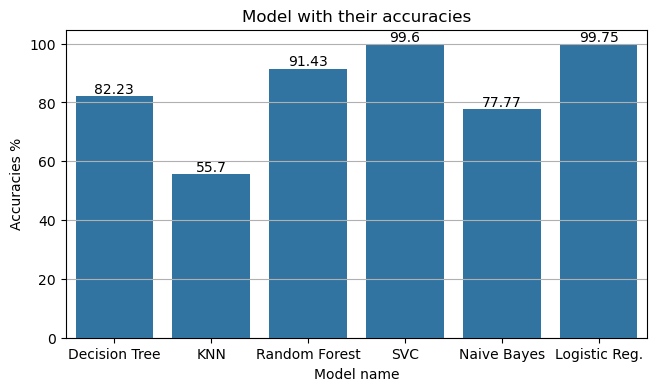

In [5]:
model_name = ['Decision Tree','KNN','Random Forest','SVC','Naive Bayes',"Logistic Reg."]
accuracy = [82.23,55.70,91.43,99.60,77.77,99.75]
plt.figure(figsize=(7.5,4))
plt.grid()
ax = sns.barplot(x=model_name,y=accuracy)#.bar_label(accuracy)
for i in ax.containers:
    ax.bar_label(i,)
# plt.xticks(rotation=90)
plt.title("Model with their accuracies")
plt.xlabel("Model name")
plt.ylabel("Accuracies %")
plt.show()

In [321]:
import pickle
pickle.dump(LR_clf, open("LR_model.pkl","wb"))